In [1]:
### K- Nearest Neighbours
library(dplyr)
library(class)
library(caret)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2


In [2]:
signs<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\Data mining\\signs.csv',stringsAsFactors = F)

str(signs)


'data.frame':	205 obs. of  50 variables:
 $ sample   : chr  "train" "train" "train" "train" ...
 $ sign_type: chr  "pedestrian" "pedestrian" "pedestrian" "pedestrian" ...
 $ r1       : int  155 142 57 22 169 75 136 118 149 13 ...
 $ g1       : int  228 217 54 35 179 67 149 105 225 34 ...
 $ b1       : int  251 242 50 41 170 60 157 69 241 28 ...
 $ r2       : int  135 166 187 171 231 131 200 244 34 5 ...
 $ g2       : int  188 204 201 178 254 89 203 245 45 21 ...
 $ b2       : int  101 44 68 26 27 53 107 67 1 11 ...
 $ r3       : int  156 142 51 19 97 214 150 132 155 123 ...
 $ g3       : int  227 217 51 27 107 144 167 123 226 154 ...
 $ b3       : int  245 242 45 29 99 75 134 12 238 140 ...
 $ r4       : int  145 147 59 19 123 156 171 138 147 21 ...
 $ g4       : int  211 219 62 27 147 169 218 123 222 46 ...
 $ b4       : int  228 242 65 29 152 190 252 85 242 41 ...
 $ r5       : int  166 164 156 42 221 67 171 254 170 36 ...
 $ g5       : int  233 228 171 37 236 50 158 254 191 60 ...
 

In [3]:
table(signs$sign_type)


pedestrian      speed       stop 
        65         70         70 

In [4]:
signs_train<-signs%>%
  filter(sample=='train')

In [5]:
signs_test<-signs%>%
  filter(sample=='test')

In [6]:
signs_train$sample<-NULL
signs_test$sample<-NULL

In [7]:
sign_1<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\Data mining\\sign_1.csv',stringsAsFactors = F)

In [9]:
knn(train = signs_train[,-1],test = sign_1,cl = signs_train$sign_type,k=5 )

[1] stop
Levels: pedestrian speed stop

In [10]:
knn1<-knn(train = signs_train[,-1],test = signs_test[,-1],cl = signs_train$sign_type,k=5 )
knn1[1:20]

[1] pedestrian pedestrian pedestrian speed      pedestrian pedestrian
 [7] pedestrian pedestrian pedestrian pedestrian pedestrian pedestrian
[13] pedestrian pedestrian pedestrian pedestrian pedestrian pedestrian
[19] pedestrian speed     
Levels: pedestrian speed stop

In [11]:
table(knn1,signs_test$sign_type)

            
knn1         pedestrian speed stop
  pedestrian         18     0    0
  speed               1    19    0
  stop                0     2   19

In [12]:
mean(knn1==signs_test$sign_type)

[1] 0.9491525

In [13]:
knn_p<-knn(train = signs_train[,-1],test = signs_test[,-1],cl = signs_train$sign_type,k=5,prob = T )

In [14]:
attr(knn_p,'prob')

df<-data.frame(class=knn1,probs=attr(knn_p,'prob'))

df

[1] 0.6 0.6 0.8 0.4 1.0 0.6 0.8 1.0 0.6 1.0 1.0 1.0 0.8 1.0 1.0 1.0 1.0 1.0 0.8
[20] 0.8 0.6 1.0 1.0 1.0 1.0 1.0 1.0 0.6 0.4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[39] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.8 1.0 0.8 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[58] 1.0 1.0

class,probs
pedestrian,0.6
pedestrian,0.6
pedestrian,0.8
speed,0.4
pedestrian,1.0
pedestrian,0.6
pedestrian,0.8
pedestrian,1.0
pedestrian,0.6
pedestrian,1.0


In [15]:
#### Doing with caret KNN

diabetes<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\Data mining\\final\\Diabetes.csv',stringsAsFactors=F)

str(diabetes)

'data.frame':	768 obs. of  9 variables:
 $ NTS  : int  6 1 8 1 0 5 3 10 2 8 ...
 $ PGC  : int  148 85 183 89 137 116 78 115 197 125 ...
 $ DBP  : int  72 66 64 66 40 74 50 0 70 96 ...
 $ TSFT : int  35 29 0 23 35 0 32 0 45 0 ...
 $ INS  : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI  : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DPF  : num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age  : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Class: chr  "Yes" "No" "Yes" "No" ...


In [16]:
set.seed(42)

In [20]:
trc<-trainControl(method='cv',number=10)

In [21]:
knn_c<-train(Class~.,data=diabetes,method='knn',trControl=trc,preProcess=c('center','scale'),tuneLength=10)

In [22]:
knn_c$results

k,Accuracy,Kappa,AccuracySD,KappaSD
5,0.7461381,0.4219006,0.02646740,0.06594878
7,0.7382946,0.4003582,0.03260308,0.08370286
9,0.7434894,0.4110116,0.03472152,0.08836272
11,0.7422078,0.4071813,0.04183189,0.10729202
13,0.7435065,0.4057369,0.04450922,0.10948900
15,0.7435578,0.4047535,0.04156109,0.10258243
17,0.7500342,0.4147416,0.05059676,0.12380171
19,0.7539303,0.4173851,0.04749078,0.12577251
21,0.7564935,0.4216512,0.04551696,0.11955907
23,0.7473684,0.4015615,0.05070581,0.13241805


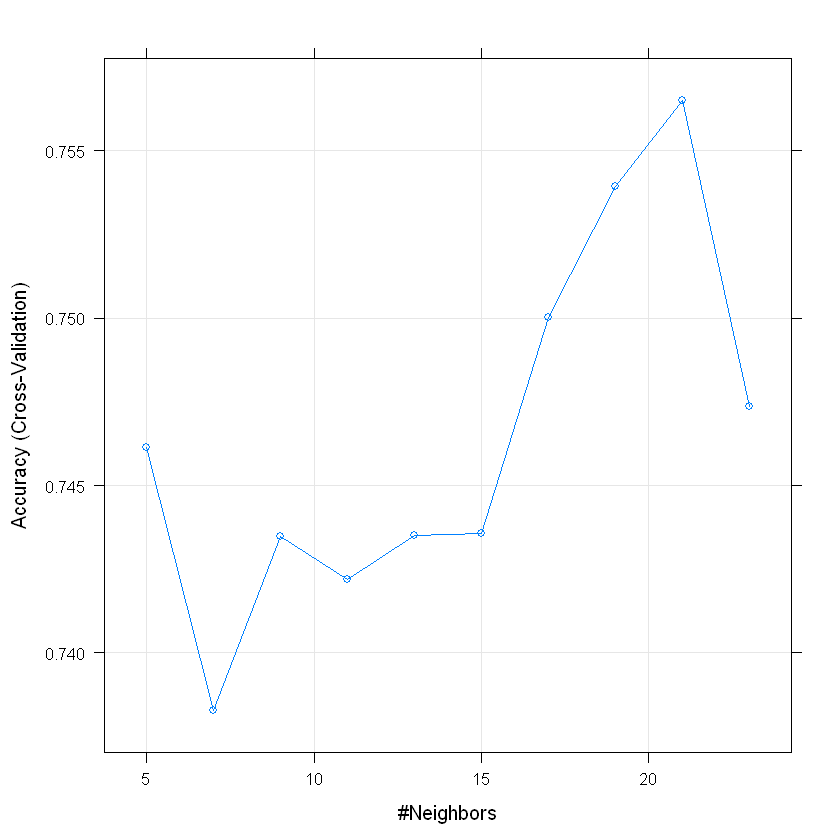

In [23]:
plot(knn_c)

In [24]:
grid<-expand.grid(k=15:30)

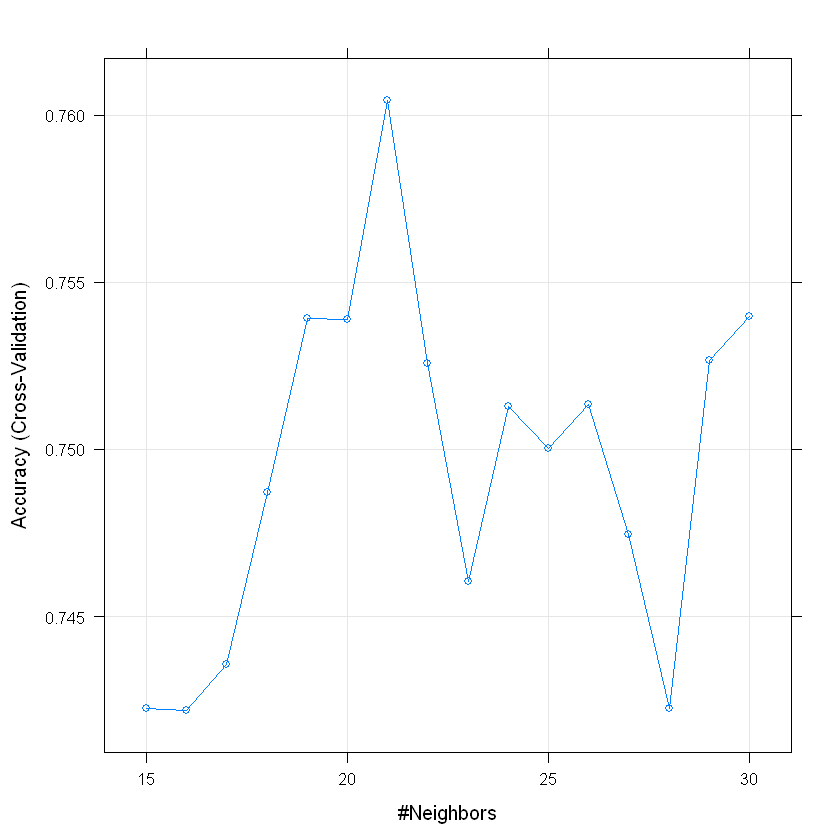

In [25]:
knn_c2<-train(Class~.,data=diabetes,method='knn',trControl=trc,preProcess=c('center','scale'),tuneGrid=grid)
plot(knn_c2)